In [1]:
using Distributions
using StatsPlots
using Turing


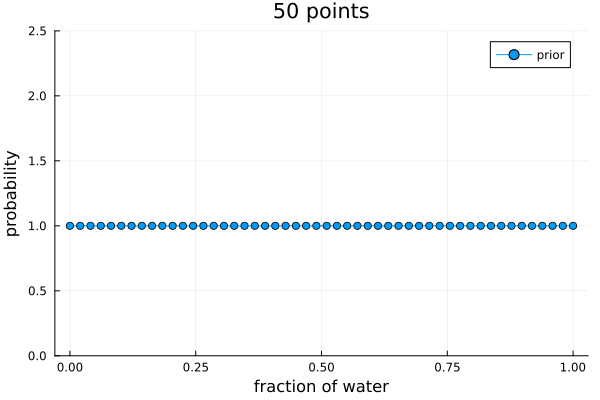

In [2]:

# globe tossing
# Grid approximation
size = 50
θ_grid = range(0, 1; length=size)
# uniform prior (alpha = 1, beta = 1)
prior = pdf.(Beta(1,1), θ_grid) # prior is for θ
plot(θ_grid, prior; ylims=[0, 2.5], label = "prior", xlabel="fraction of water", ylabel="probability",
title="$size points", markershape=:circle)


In [ ]:

# first tossing: W
likelihood = [ θ for θ in θ_grid ] # likelihood is for W (probability to get W)
posterior_unstandardized = likelihood .* prior
posterior = posterior_unstandardized / sum(posterior_unstandardized) * size
plot!(θ_grid, posterior; label = "W", markershape=:utriangle)
# second tossing: L
prior = posterior # the posterior from the previous step is now the prior
likelihood = [ 1-θ for θ in θ_grid ]
posterior_unstandardized = likelihood .* prior
posterior = posterior_unstandardized / sum(posterior_unstandardized) * size
plot!(θ_grid, posterior; label = "WL", markershape=:ltriangle)
# third tossing: W
prior = posterior # the posterior from the previous step is now the prior
likelihood = [ θ for θ in θ_grid ]
posterior_unstandardized = likelihood .* prior
posterior = posterior_unstandardized / sum(posterior_unstandardized) * size
plot!(θ_grid, posterior; label = "WLW", markershape=:rtriangle)
# fourth tossing: W
prior = posterior # the posterior from the previous step is now the prior
likelihood = [ θ for θ in θ_grid ]
posterior_unstandardized = likelihood .* prior
posterior = posterior_unstandardized / sum(posterior_unstandardized) * size
plot!(θ_grid, posterior; label = "WLWW", markershape=:rect, markercolor=:red)
# We can check each of the steps using the analytic solution
# first tossing W
#analytic = Beta(1+1, 1+0)) #(W = 1, L = 0)
#plot!(θ_grid, pdf.(analytic, θ_grid); linestyle = :dash)
# second tossing L
#analytic = Beta(1+1, 1+1)) #(W = 1, L = 1)
#plot!(θ_grid, pdf.(analytic, θ_grid); linestyle = :dash)
# third tossing W
#analytic = Beta(1+2, 1+1)) #(W = 2, L = 1)
#plot!(θ_grid, pdf.(analytic, θ_grid); linestyle = :dash)